# SARIMAX

Imports

In [23]:
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

ADF Statistic: -4.008970
p-value: 0.001364


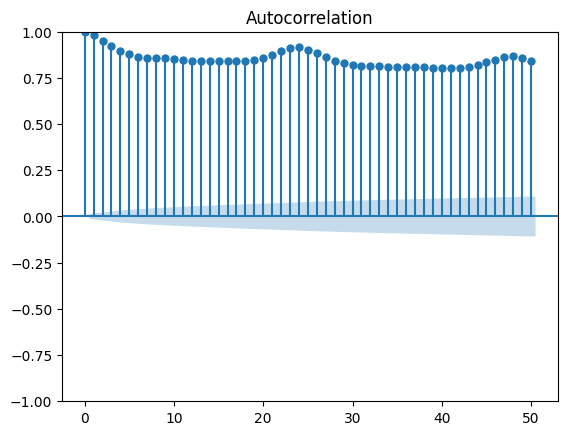

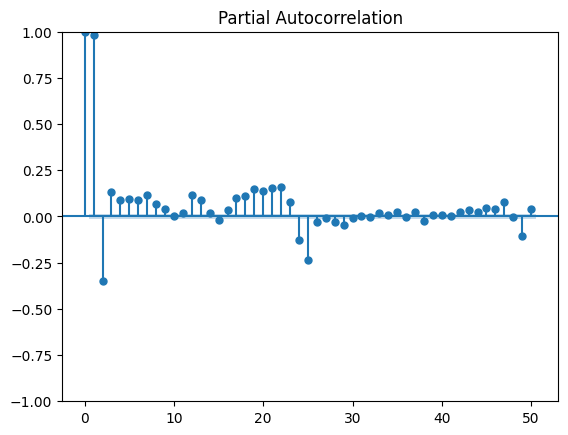

In [26]:
df = pd.read_csv('../data_NO2.csv', sep=';')
df['datetime_utc'] = pd.to_datetime(df['datetime_utc'])
df.sort_values(by='datetime_utc', inplace=True)
df['year'] = df['datetime_utc'].dt.year
df['month'] = df['datetime_utc'].dt.month
df['day'] = df['datetime_utc'].dt.day
df['hour'] = df['datetime_utc'].dt.hour
df['week_number'] = df['datetime_utc'].dt.isocalendar().week
df['weekday'] = df['datetime_utc'].dt.dayofweek



adf_test = adfuller(df['spot_price'])
# Output the results
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

plot_acf(df['spot_price'], lags=50)
plot_pacf(df['spot_price'], lags=50)
plt.show()

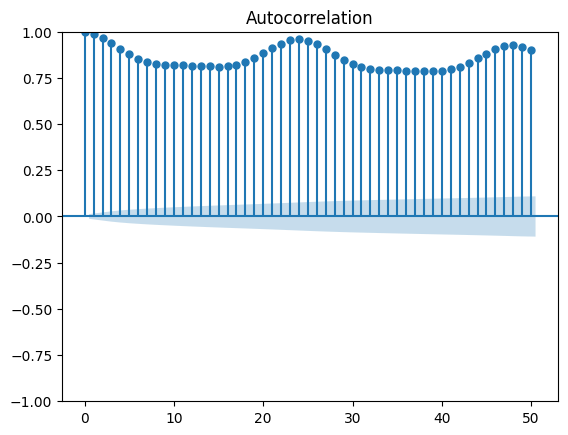

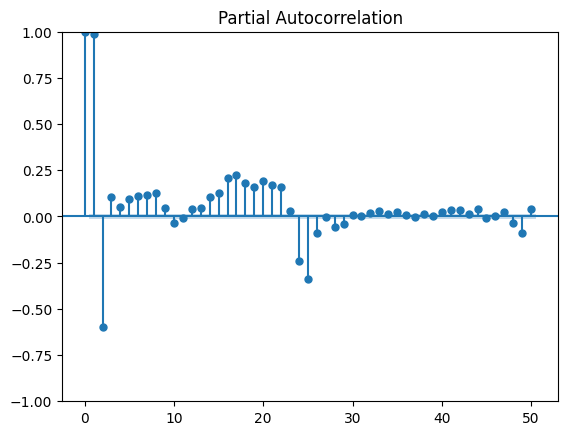

In [27]:
plot_acf(df['volume_demand'], lags=50)
plot_pacf(df['volume_demand'], lags=50)
plt.show()

In [18]:
target = {
    'h': 'Hourly. Predict price for all 24 hours of the next date.',
    'ds': 'Daily  sum. Predict sum of prices for the day ahead.',
    'da': 'Daily average. Predict the average price for the day ahead.',
    'dc': 'Daily chosen. Predict the price of a chosen hour for the day ahead.'
}

class LinearModel():
    def __init__(self, n_lags=24, last_obs=23, n_targets=24):
        self.train = None
        self.test = None
        self.n_lags = n_lags
        self.last_obs = last_obs
        self.n_targets = n_targets

    def create_datasets(self, df):
        df = df.sort_values(by='datetime_utc')
        for i in range(1, self.n_lags+1):
            df['price_b' + str(i)] = df['spot_price'].shift(i)
            df['dem_b' + str(i)] = df['volume_demand'].shift(i)
            df['prod_b' + str(i)] = df['volume_production'].shift(i)
        for i in range(1,self.n_targets+1):
            df['price_f' + str(i)] = df['spot_price'].shift(-i)

        filt = df[df['hour'] == 23]
        display(filt)

        # X = []
        # y = []
        # for row in df.iterrows():
            
        

lm = LinearModel()

lm.create_datasets(df)




,datetime_utc,volume_demand,volume_production,spot_price,year,month,day,hour,week_number,weekday,...,price_f15,price_f16,price_f17,price_f18,price_f19,price_f20,price_f21,price_f22,price_f23,price_f24
0,2015-12-31 23:00:00+00:00,4043.0,7818.0,16.39,2015,12,31,23,53,3,...,18.00,18.53,19.11,18.68,17.93,17.69,17.33,16.75,16.25,16.47
24,2016-01-01 23:00:00+00:00,4118.0,8121.0,16.47,2016,1,1,23,53,4,...,15.99,16.22,16.51,16.37,16.08,16.15,15.83,15.82,15.31,15.99
48,2016-01-02 23:00:00+00:00,4611.0,7222.0,15.99,2016,1,2,23,53,5,...,16.30,16.45,17.22,16.83,16.48,16.43,16.43,16.26,15.74,15.86
72,2016-01-03 23:00:00+00:00,4622.0,7353.0,15.86,2016,1,3,23,53,6,...,20.09,20.79,21.07,20.54,19.77,19.05,18.50,17.71,17.03,17.68
96,2016-01-04 23:00:00+00:00,4893.0,8698.0,17.68,2016,1,4,23,1,0,...,20.71,20.96,21.23,20.68,20.48,19.89,19.39,18.73,17.97,20.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,2018-09-08 23:00:00+00:00,3172.0,3695.0,51.22,2018,9,8,23,36,5,...,54.14,55.45,57.26,57.36,58.21,57.74,55.82,53.11,53.47,50.90
23590,2018-09-09 23:00:00+00:00,2950.0,3992.0,50.90,2018,9,9,23,36,6,...,57.12,57.44,57.46,57.49,57.11,56.36,55.33,54.13,53.40,51.28
23614,2018-09-10 23:00:00+00:00,3057.0,4775.0,51.28,2018,9,10,23,37,0,...,51.08,52.59,52.91,54.08,54.15,54.20,53.04,50.94,48.32,47.14
23638,2018-09-11 23:00:00+00:00,3230.0,4643.0,47.14,2018,9,11,23,37,1,...,54.09,54.60,54.88,54.91,54.88,54.26,52.06,49.55,50.53,50.12


- Prophet
- LSTM